### Imports

In [11]:
import matplotlib.pyplot as plt #→ plotting / visualization
import nibabel as nib #→ loading nifti files
import numpy as np 
import skimage as ski
import matplotlib.patches as patches
import pydicom as dicom

### Data load

In [ ]:
data = nib.load("./data/Dtu - CT BBH_CT_Lavdosis_BH_1.25mm_20240923083332_2.nii").get_fdata()
data_info = nib.load("./data/Dtu - CT BBH_CT_Lavdosis_BH_1.25mm_20240923083332_2.nii").header
print(data_info['pixdim'][1:4])
print(data_info['dim'][1:4])
img = np.flipud(np.fliplr(data))

# To get scanner name
#dcmdata = dicom.dcmread("IM-0001-0374.dcm")
#print(dcmdata)




[0.976562 0.976562 1.25    ]
[512 512 469]


### Intensity profiles

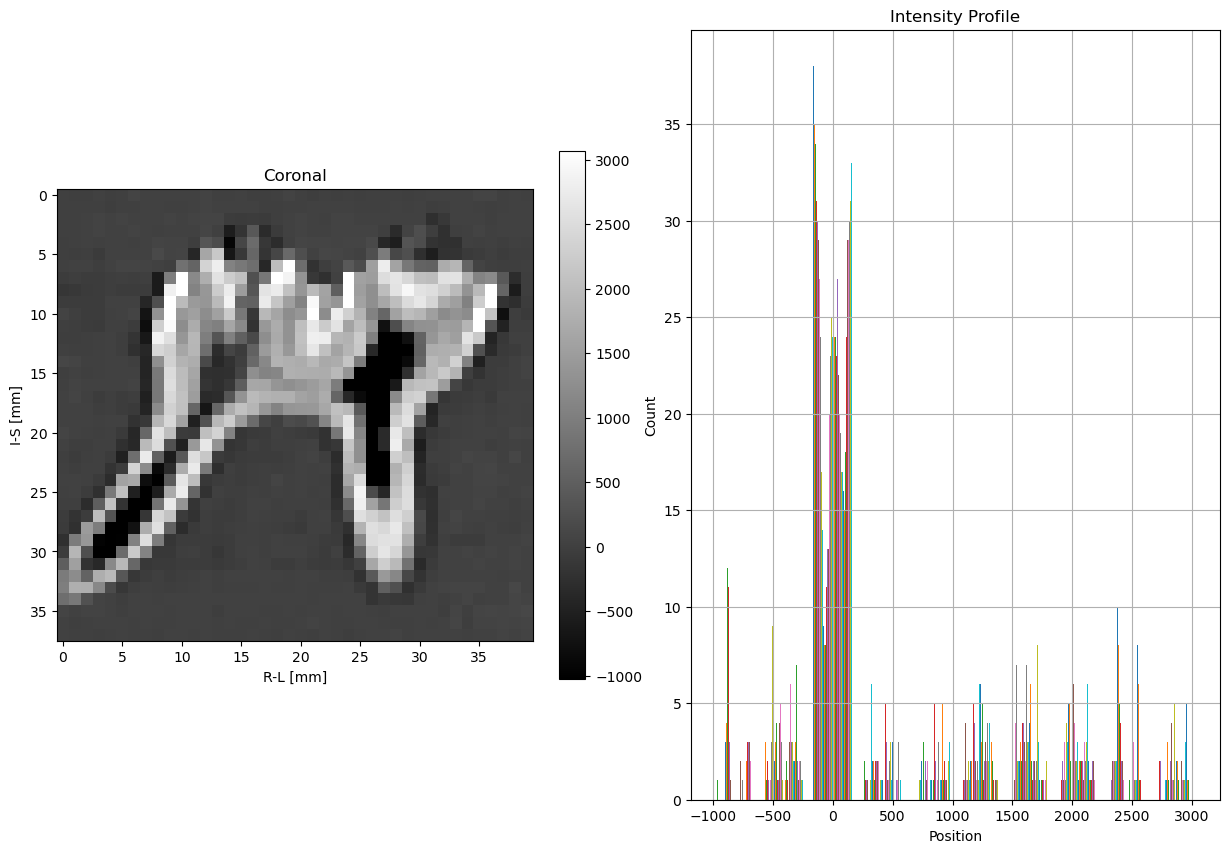

In [5]:
rows = 1
columns = 2
fig = plt.figure(figsize=(15, 10))

i1 = data[100:195,260:340,403] # Not used
i2 = img[115:190,293,320:435]
i3 = img[140:180,290,380:418].T
i4 = img[127:142,290,342:358].T

# Choose one, this determines the intensity profile
#intensity_profile = i1[0:512,0:512]
#intensity_profile = i2[0:512,0:512]
intensity_profile = i3[0:512,0:512]
#intensity_profile = i4[0:512,0:512]

# Plot to match profile(just visual)
fig.add_subplot(rows, columns, 1)
#figax = plt.imshow(ski.transform.rotate(img[100:195,260:340,403] , 270, resize = True),cmap="grey") # For i1
#figax = plt.imshow(ski.transform.rotate(img[115:190,290,320:435].T , 180, resize = True),cmap="grey") # For i2
figax = plt.imshow(ski.transform.rotate(img[140:180,290,380:418].T , 180, resize = True),cmap="grey") # For i3
#figax = plt.imshow(ski.transform.rotate(img[127:142,290,342:358].T , 180, resize = True),cmap="grey") # For i4

plt.title('Coronal')
plt.xlabel('R-L [mm]')
plt.ylabel('I-S [mm]')
plt.colorbar(figax,fraction=0.05,pad=0.05) 

fig.add_subplot(rows, columns, 2)
plt.hist(intensity_profile)
plt.xlabel('Position')
plt.ylabel('Count')
plt.title('Intensity Profile')
plt.grid(True)
plt.show()


### Window-level function

In [6]:
#
def window_level(image, window): #, level
    # your code here ...
    imgclipped = np.maximum(np.minimum(image, window[1]), window[0])
    img_WL = (imgclipped - (window[0])) / (window[1] - (window[0]))
    return img_WL



### Overviews

(512, 512, 469)
(512, 512, 469)


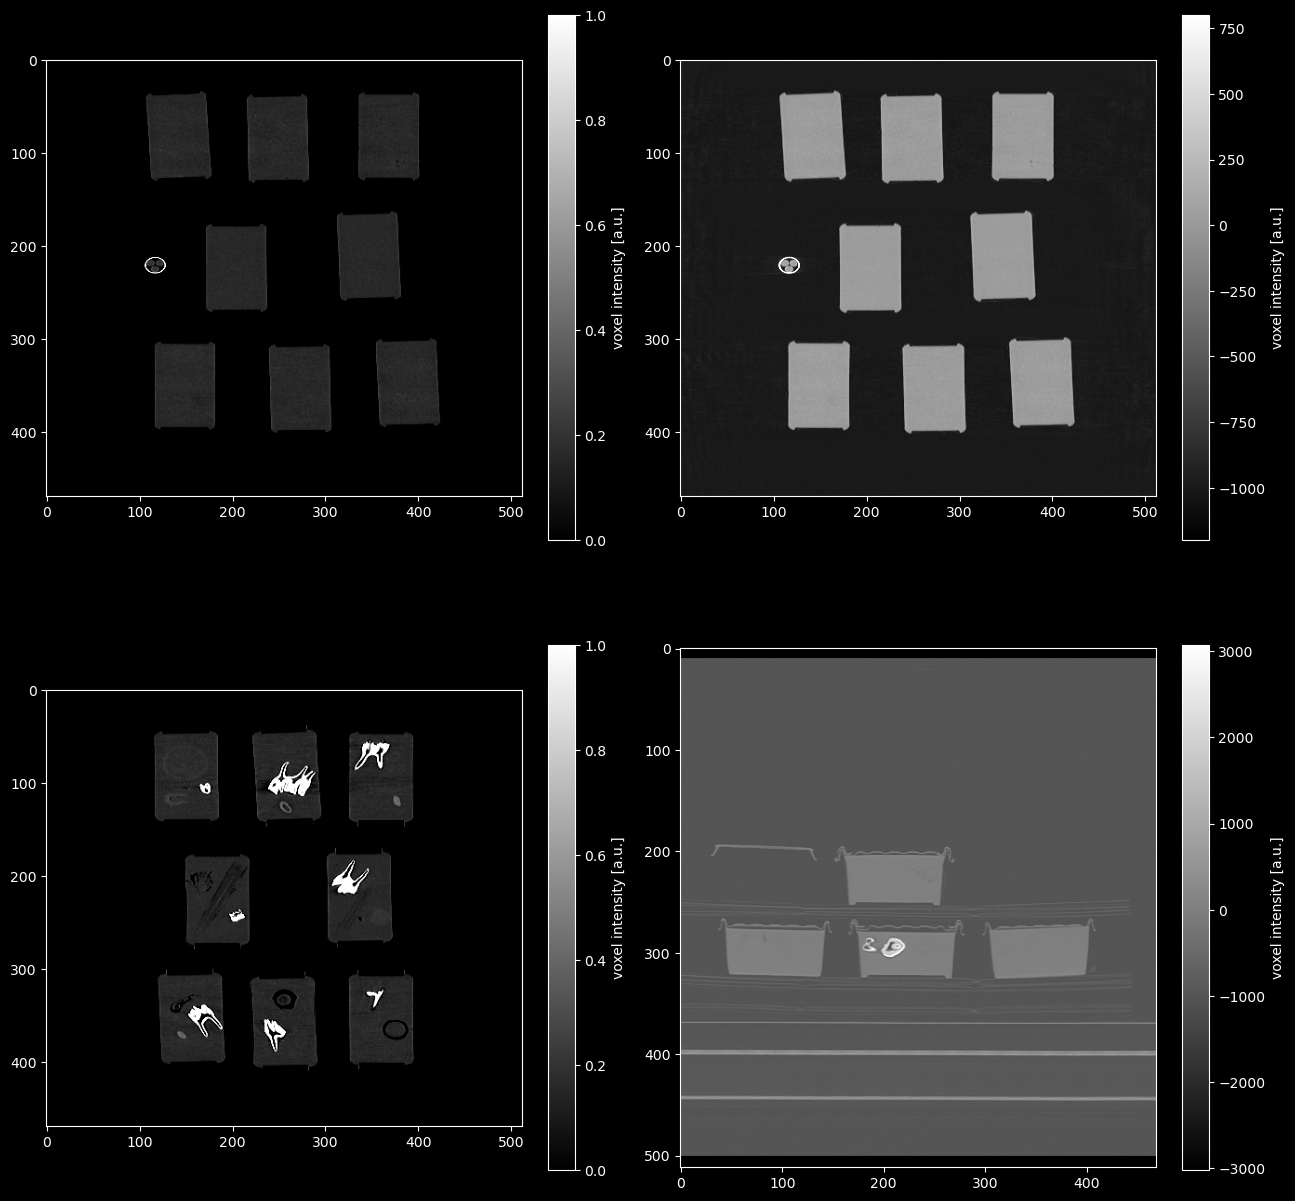

In [7]:
# Just used to slice around, nothing here shown in report.
shape = img.shape
print(shape)
print(data.shape)
imgfunc1 = window_level(img,[-200,1200])
plt.style.use('dark_background')

rows = 2
columns = 2
wlmax = 1000
fig = plt.figure(figsize=(15, 15))

fig.add_subplot(rows, columns, 1)
figwin = plt.imshow(ski.transform.rotate(imgfunc1[:,240,:].T , 180, resize = True),cmap="grey")# angle 180
plt.colorbar(figwin,fraction=0.05,pad=0.05,label="voxel intensity [a.u.]")

fig.add_subplot(rows, columns, 2)
figwin1 = plt.imshow(ski.transform.rotate(img[:,240,:].T , 180, resize = True),cmap="grey",vmin=-1200,vmax=800)# angle 180
plt.colorbar(figwin1,fraction=0.05,pad=0.05,label="voxel intensity [a.u.]")

fig.add_subplot(rows, columns, 3)
figwin = plt.imshow(ski.transform.rotate(imgfunc1[:,290,:].T , 180, resize = True),cmap="grey")# angle 180
plt.colorbar(figwin,fraction=0.05,pad=0.05,label="voxel intensity [a.u.]")

fig.add_subplot(rows, columns, 4)
figwin1 = plt.imshow(ski.transform.rotate(img[181,:,:].T , 270, resize = True),cmap="grey")# angle 180,,vmin=-400,vmax=1200
plt.colorbar(figwin1,fraction=0.05,pad=0.05,label="voxel intensity [a.u.]")

plt.show()

### Segmentation

(512, 469)
(512, 469)
(41, 20, 35)
20484
1.1920916748050001
24418.80586670562
24418.80586670562


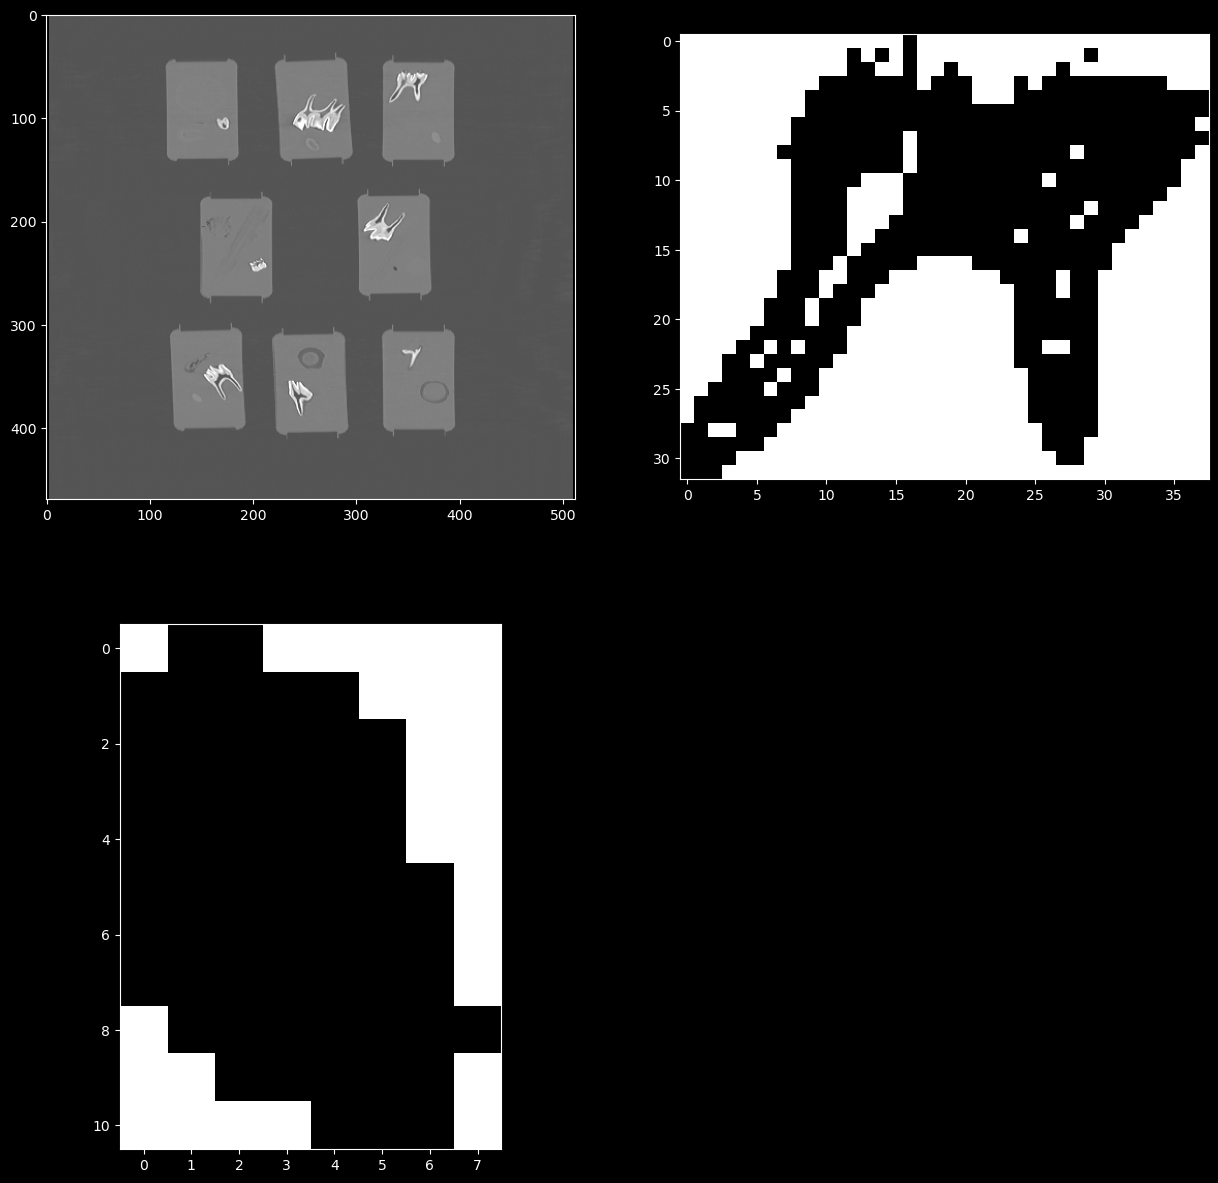

5664
[0.976562 0.976562 1.25    ]
[512 512 469]
5915.036034000001
37.109356
31.249984
7.812496
8.789058


In [8]:
# Subplot size
rows = 2
columns = 2

fig = plt.figure(figsize=(15, 15))
fig.add_subplot(rows, columns, 1)

# Plots and calcs for length and width segmentation
figwin = plt.imshow(ski.transform.rotate(img[:,290,:].T , 180, resize = True), cmap="gray")
imgnew = np.squeeze(ski.transform.rotate(img[:,290,:] , 180, resize = True))# angle 180
print(imgnew.shape)

mask = (imgnew <= 250) & (imgnew >= -750)
print(mask.shape)

# Calcs for volume
img3d = np.squeeze(ski.transform.rotate(img[140:181,281:301,382:417] , 180, resize = True))
mask3d = (img3d <= 250) & (img3d >= -750)
print(mask3d.shape)
print(np.count_nonzero(mask3d))
print(0.976562*0.976562*1.25) # Volume of single voxel in 3d
# Voxels times values of a single voxel()
print(np.count_nonzero(mask3d)*(0.976562*0.976562*1.25))
print(20484*1.1920916748050001)

# Plots for length and segmentation
fig.add_subplot(rows, columns, 2)
figwin1 = plt.imshow(ski.transform.rotate(mask[332:370,54:86].T , 360, resize = True),cmap="gray")# angle 180

fig.add_subplot(rows, columns, 3)
figwin1 = plt.imshow(ski.transform.rotate(mask[374:382,114:125].T , 360, resize = True),cmap="gray")# angle 180

plt.show()

# Calcs for length and width
print(np.count_nonzero(mask[327:394,47:140]))

# Dimensions used in calcs
print(data_info['pixdim'][1:4])
print(data_info['dim'][1:4])

print(6057 * 0.976562) #mm^2

#nyt
# Pixel times dimensions
print(38 *0.976562) #mm
print(32 *0.976562) #mm

# Pixel times dimensions
print(8 *0.976562) #mm
print(9 *0.976562) #mm

### Signal-to-noise ratio

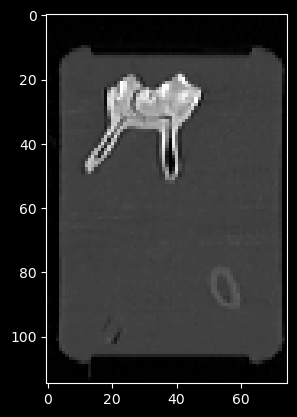

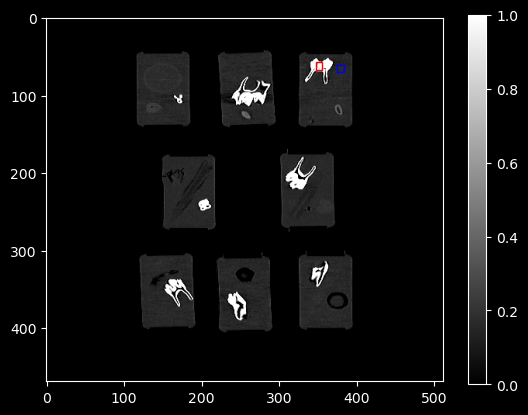

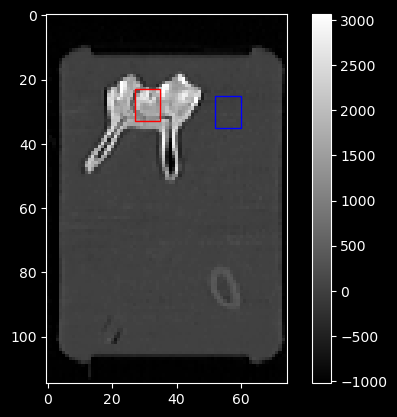

Signal-to-Noise Ratio (SNR): 57.27695065588653


In [9]:
#SNR

plt.imshow(ski.transform.rotate(img[115:190,293,320:435].T , 180, resize = True),cmap="grey")
#plt.imshow(ski.transform.rotate(img[127:135,293,395:405].T , 180, resize = True),cmap="grey")


# Rotate the ROIs

signal_roi_rotated = ski.transform.rotate(img[154:162,293,400:410].T , 180, resize = True)
noise_roi_rotated = ski.transform.rotate(img[127:135,293,395:405].T , 180, resize = True)

# Display the image with ROIs

fig, ax = plt.subplots()
img_rot= ax.imshow(ski.transform.rotate(imgfunc1[:,293,:].T , 180, resize = True),cmap="grey")# angle 180
plt.colorbar(img_rot, ax=ax)

# Add rectangles to the plot
signal_rect = patches.Rectangle((347, 57), 8, 10, linewidth=1, edgecolor='r', facecolor='none')
noise_rect = patches.Rectangle((375, 60), 8, 10, linewidth=1, edgecolor='b', facecolor='none')
ax.add_patch(signal_rect)
ax.add_patch(noise_rect)

plt.show()

# Display the image with ROIs

fig, ax = plt.subplots()
img_close = plt.imshow(ski.transform.rotate(img[115:190,293,320:435].T , 180, resize = True),cmap="grey")
plt.colorbar(img_close, ax=ax)

# Add rectangles to the plot
signal_rect1 = patches.Rectangle((27, 23), 8, 10, linewidth=1, edgecolor='r', facecolor='none')
noise_rect1 = patches.Rectangle((52, 25), 8, 10, linewidth=1, edgecolor='b', facecolor='none')
ax.add_patch(signal_rect1)
ax.add_patch(noise_rect1)

plt.show()

# Calculate mean and standard deviation
mean_signal = np.mean(signal_roi_rotated)
std_noise = np.std(noise_roi_rotated)

# Calculate SNR
snr = mean_signal / std_noise
print(f'Signal-to-Noise Ratio (SNR): {snr}')

